In [1]:
print("hello")

hello


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
database = pd.DataFrame(housing.data,columns= housing.feature_names)
database['Price_val'] = housing.target

In [7]:
database.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price_val
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Some EDA

In [8]:
database.corr().Price_val.sort_values(ascending=False)

Price_val     1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Price_val, dtype: float64

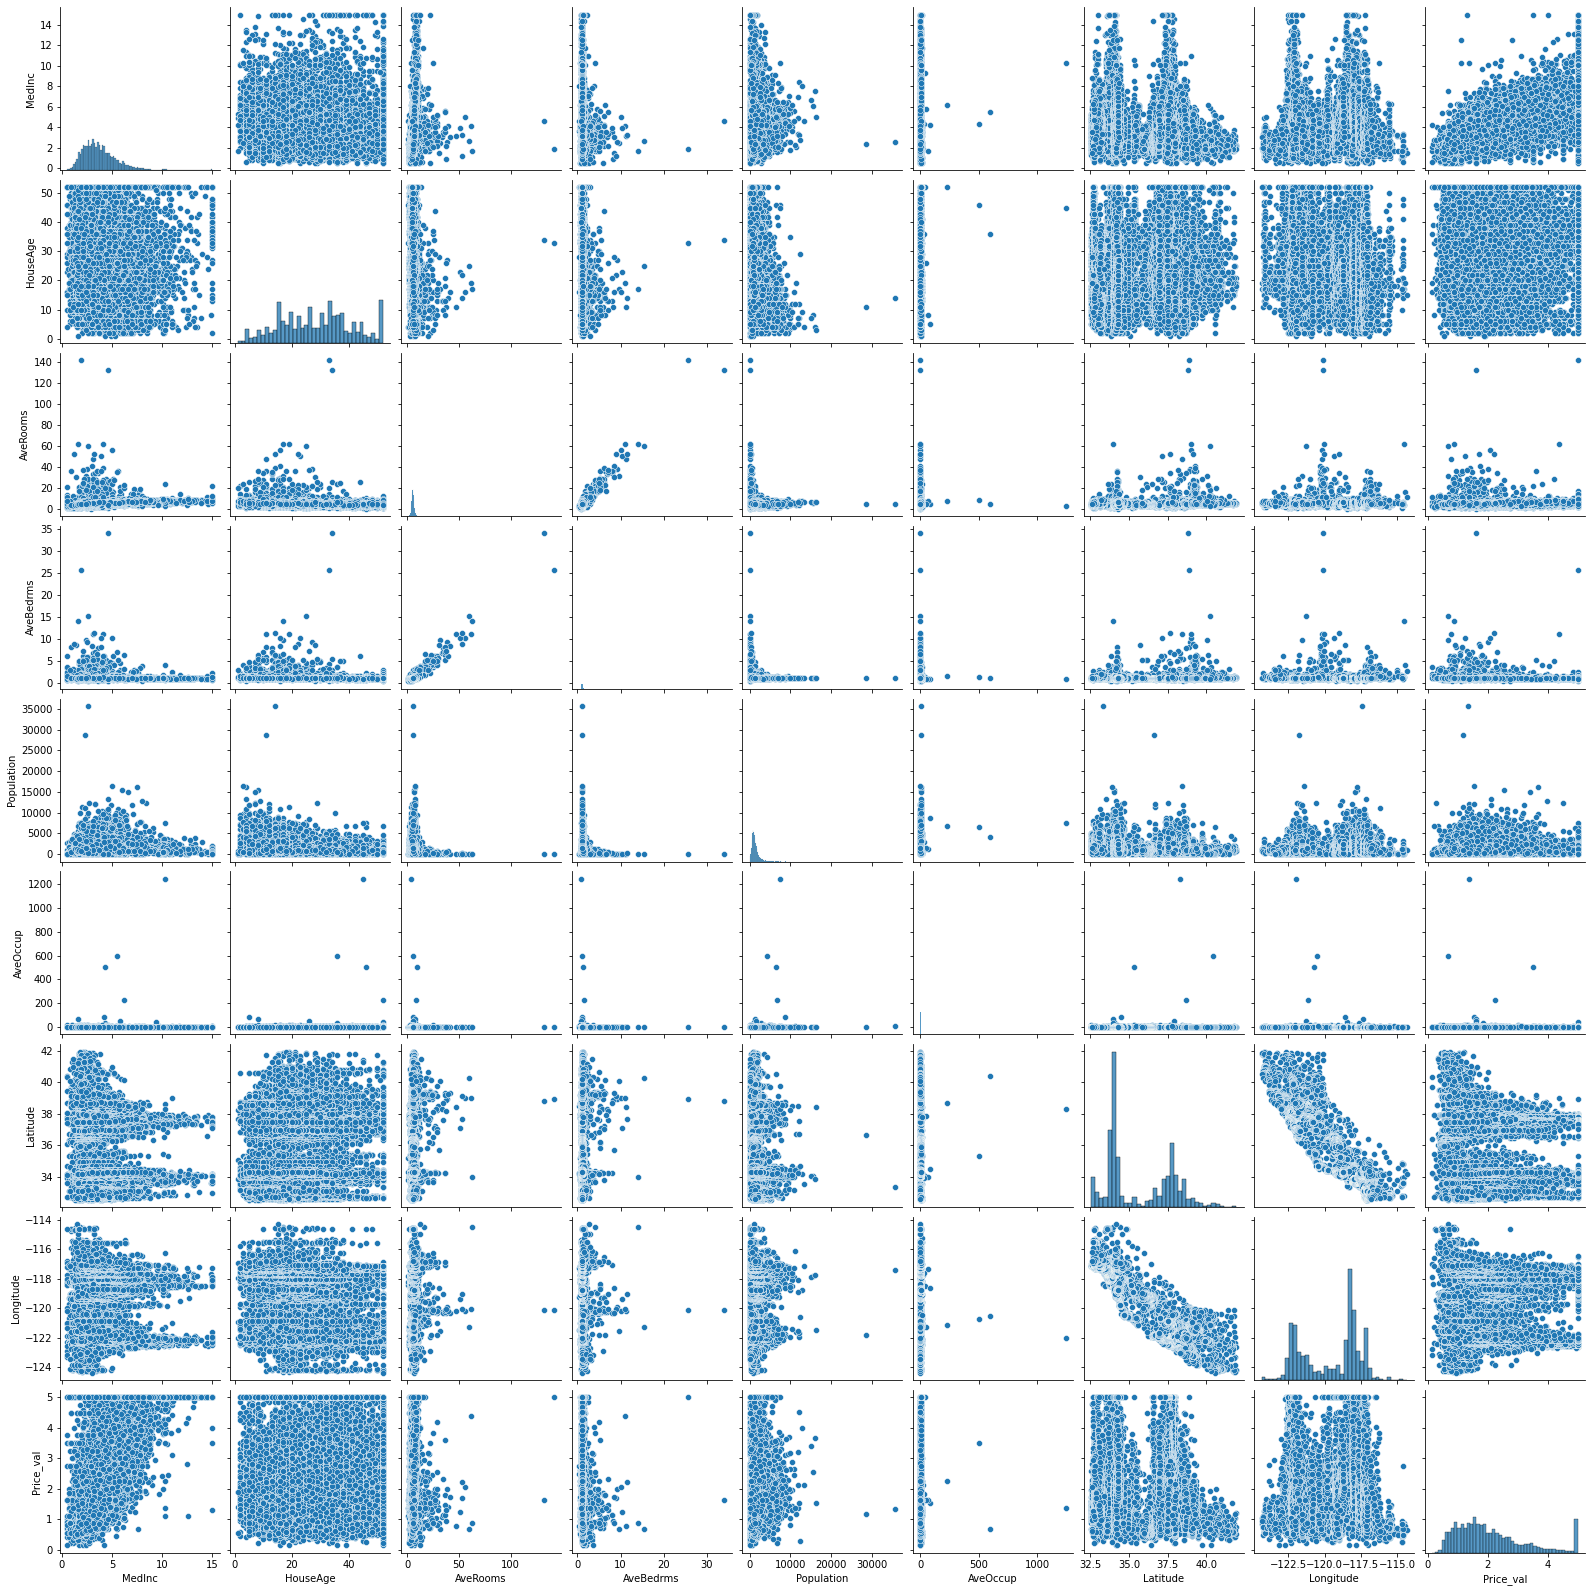

In [ ]:
sns.pairplot(database)

In [9]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price_val   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
database.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price_val
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
database.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price_val
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
database['bedroom_per_room'] = database['AveBedrms'] / database['AveRooms']


In [13]:
database.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price_val,bedroom_per_room
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.146591
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.155797
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.129516
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.184458
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.172096


In [14]:
database.corr().Price_val.sort_values(ascending=False)

Price_val           1.000000
MedInc              0.688075
AveRooms            0.151948
HouseAge            0.105623
AveOccup           -0.023737
Population         -0.024650
Longitude          -0.045967
AveBedrms          -0.046701
Latitude           -0.144160
bedroom_per_room   -0.255624
Name: Price_val, dtype: float64

Data Cleaning

In [15]:
housing = database.drop(['Price_val'], axis=1)
housing_lables = database['Price_val']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing, housing_lables, test_size=0.25, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Pickling the Scaler transformation


In [18]:
import pickle
pickle.dump(scaler, open('scaling.pkl','wb'))

Model Training

### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [20]:
lin_reg.fit(X_train, y_train)
X_pred = lin_reg.predict(X_train)

In [21]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_train, X_pred)
np.sqrt(lin_mse), lin_mse

(0.7151750575431611, 0.5114753629318638)

In [22]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [0.71787324 0.74110866 0.70403014 0.67926712 0.74159591 0.72311601
 0.68406657 0.72851617 0.73221282 0.7263949 ]
Mean: 0.7178181547546855
Standard deviation: 0.020848441795984555


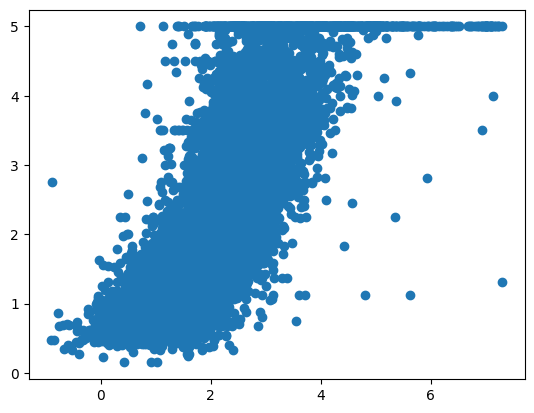

In [24]:
plt.scatter(X_pred, y_train)

### Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
forest_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, forest_pred)
np.sqrt(forest_mse)

0.1895494795244434

In [28]:
scores = cross_val_score(forest_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
rmse_forest = np.sqrt(-scores)
display_scores(rmse_forest)

Scores: [0.50968674 0.53185241 0.49310319 0.50442101 0.53656964 0.5188648
 0.46612441 0.53019907 0.50908325 0.51503802]
Mean: 0.5114942540301358
Standard deviation: 0.019788248633237304


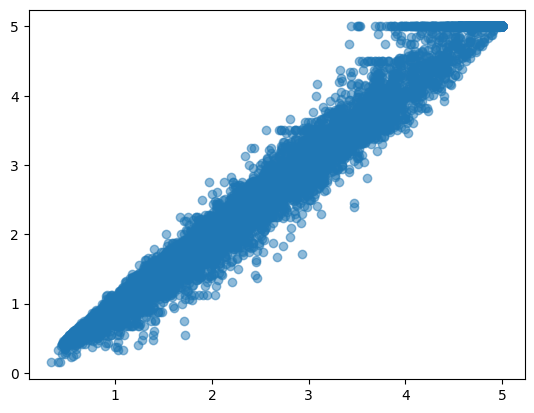

In [29]:
plt.scatter(forest_pred, y_train, alpha=0.5)

## Final Predictions

In [30]:
final_prediction = forest_reg.predict(X_test)
mse = mean_squared_error(y_test, final_prediction)
print("meanSquared Error ; " , np.sqrt(mse))

meanSquared Error ;  0.5060570808989863


## Pickling the Model File

In [31]:
import pickle

In [27]:


pickle.dump(lin_reg,  open('linear-reg.pkl', 'wb'))

In [34]:
!git --version

git version 2.38.1.windows.1
